In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, LSTM, Dropout, Dense, Flatten, Input,  Embedding, Conv1D, Input
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
imdb_data= pd.read_csv("/gdrive/My Drive/datasets/IMDB Dataset.csv")

imdb_data.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
imdb_data.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [ ]:
X = imdb_data["review"]

y = pd.get_dummies(imdb_data.sentiment, prefix='sent', drop_first=True).values

In [ ]:
y.shape

(50000, 1)

In [ ]:
def clean_text(doc):

    document = remove_tags(doc)

    document = re.sub('[^a-zA-Z]', ' ', document)

    document = re.sub(r"\s+[a-zA-Z]\s+", ' ', document)

    document = re.sub(r'\s+', ' ', document)

    return document

In [ ]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(document):
    return TAG_RE.sub('', document)

In [ ]:
X_sentences = []
reviews = list(X)
for rev in reviews:
    X_sentences.append(clean_text(rev))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sentences, y, test_size=0.20, random_state=42)

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

embedd_dict= dict()
glove_embeddings = open('/gdrive/My Drive/datasets/glove.6B.100d.txt', encoding="utf8")


In [ ]:
for embeddings in glove_embeddings:
    embedding_tokens = embeddings.split()
    emb_word = embedding_tokens [0]
    emb_vector = asarray(   embedding_tokens[1:], dtype='float32')
    embedd_dict [emb_word] = emb_vector 

glove_embeddings.close()

In [ ]:
embedd_mat= zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embedd_dict.get(word)
    if embedding_vector is not None:
        embedd_mat[index] = embedding_vector

In [ ]:
embedd_mat.shape

(92547, 100)

In [ ]:
embedding_inputs = Input(shape=(maxlen))
embedding_layer = Embedding(vocab_size, 100, weights=[embedd_mat], trainable=False)(embedding_inputs )
conv1 = Conv1D(128, 3, strides = 2, activation= 'relu')(embedding_layer)
conv2 = Conv1D(64, 3, strides = 2, activation= 'relu')(conv1)
flat1 = Flatten()(conv2)
drop1 = Dropout(0.2)(flat1)
dense1 = Dense(512, activation = 'relu')(drop1)
drop2  = Dropout(0.2)(dense1)
output_layer = Dense(1, activation= 'sigmoid')(drop2)

model = Model(embedding_inputs, output_layer )

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

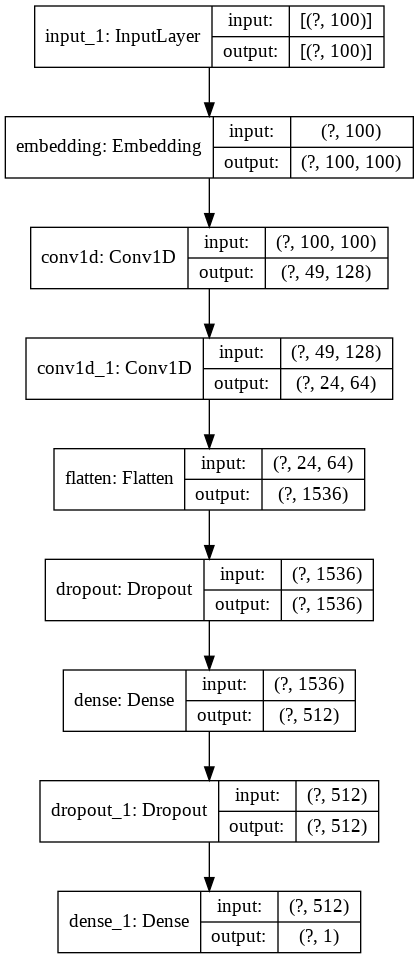

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(X_train, y_train, batch_size= 64, epochs=10, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/10
500/500 [==============================] - 19s 37ms/step - loss: 0.5289 - accuracy: 0.7250 - val_loss: 0.4257 - val_accuracy: 0.8040
Epoch 2/10
500/500 [==============================] - 19s 37ms/step - loss: 0.4055 - accuracy: 0.8146 - val_loss: 0.3895 - val_accuracy: 0.8164
Epoch 3/10
500/500 [==============================] - 18s 37ms/step - loss: 0.3660 - accuracy: 0.8346 - val_loss: 0.3856 - val_accuracy: 0.8250
Epoch 4/10
500/500 [==============================] - 19s 38ms/step - loss: 0.3135 - accuracy: 0.8631 - val_loss: 0.3936 - val_accuracy: 0.8267
Epoch 5/10
500/500 [==============================] - 19s 39ms/step - loss: 0.2682 - accuracy: 0.8841 - val_loss: 0.4436 - val_accuracy: 0.8109
Epoch 6/10
500/500 [==============================] - 19s 39ms/step - loss: 0.2238 - accuracy: 0.9066 - val_loss: 0.4731 - val_accuracy: 0.8177
Epoch 7/10
500/500 [==============================] - 19s 38ms/step - loss: 0.1810 - accuracy: 0.9257 - val_loss: 0.4826 - val_accuracy:

In [1]:
print(score[0])
print(score[1])

NameError: ignored

## Exercise 10.1

**Question 1:**

Which of the following is not a pre trained word embedding?

A.	Glove

B.	Stanford

C.	Peeking

D.	All of the above

Answer: C

**Question 2:**

What should be the first argument to the Keras Embedding Layer.

A.	The input vector dimensions

B.	The output vector dimensions

C.	The word embedding size

D.	The vocabulary size

Answer: D

**Question 3:**

Which layer will you need to use if you want to directly connect the Embedding Layer with a Dense Layer?

A.	LSTM layer with return_sequence set to False

B.	CNN layer with max pooling

C.	Flatten layer

D.	None of the Above

Answer: C


## Exercise 10.2

Using the airline_review.csv dataset, that we used for sentiment classification in section 10.1, perform sentiment classification using a DNN (Densely connected neural networks)
See if you can get better results with DNN as compared to the results in section 10.1.


**Solution:**

In [ ]:

import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, LSTM, Dropout, Dense, Flatten, Input,  Embedding, Conv1D, Input
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from google.colab import drive
drive.mount('/gdrive')

airline_data = pd.read_csv("/gdrive/My Drive/datasets/airline_review.csv")
airline_data.head()


X = airline_data["text"]

y = pd.get_dummies(airline_data.airline_sentiment, prefix='sent').values

def clean_text(doc):

    document = remove_tags(doc)

    document = re.sub('[^a-zA-Z]', ' ', document)

    document = re.sub(r"\s+[a-zA-Z]\s+", ' ', document)

    document = re.sub(r'\s+', ' ', document)

    return document
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(document):
    return TAG_RE.sub('', document)
X_sentences = []
reviews = list(X)
for rev in reviews:
    X_sentences.append(clean_text(rev))
X_train, X_test, y_train, y_test = train_test_split(X_sentences, y, test_size=0.20, random_state=42)
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
from numpy import array
from numpy import asarray
from numpy import zeros

embedd_dict= dict()
glove_embeddings = open('/gdrive/My Drive/datasets/glove.6B.100d.txt', encoding="utf8")

for embeddings in glove_embeddings:
    embedding_tokens = embeddings.split()
    emb_word = embedding_tokens [0]
    emb_vector = asarray(   embedding_tokens[1:], dtype='float32')
    embedd_dict [emb_word] = emb_vector 

glove_embeddings.close()
embedd_mat= zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embedd_dict.get(word)
    if embedding_vector is not None:
        embedd_mat[index] = embedding_vector
embedd_mat.shape

embedding_inputs = Input(shape=(maxlen))
embedding_layer = Embedding(vocab_size, 100, weights=[embedd_mat], trainable=False)(embedding_inputs )
flatten_layer = Flatten()(embedding_layer)

dense1 = Dense(512, activation='relu')(flatten_layer)
do1 = Dropout(0.3)(dense1)

dense2 = Dense(512, activation='relu')(do1)
do2 = Dropout(0.3)(dense2)

dense3 = Dense(512, activation='relu')(do2)
do3 = Dropout(0.3)(dense3)

output_layer = Dense(y_train.shape[1], activation='softmax')(do3)
model = Model(embedding_inputs, output_layer)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)
history = model.fit(X_train, y_train, batch_size= 128, epochs=10, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)
print(score[0])
print(score[1])

